In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize

#perform doc2vec embeddings on comments with gensim
#ensure nltk.download('punkt') and nltk.download('punkt_tab') have been downloaded
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import matplotlib.pyplot as plt

In [43]:
#read in the data
data = pd.read_csv('comments.csv',header=None,names=['comment'])
n_samples = 1000
sample_data = data['comment'][:n_samples]

In [44]:
sample_data

0      RT @NancyLeeGrahn: How did everyone feel about...
1      RT @ScottWalker: Didn't catch the full #GOPdeb...
2      RT @TJMShow: No mention of Tamir Rice and the ...
3      RT @RobGeorge: That Carly Fiorina is trending ...
4      RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                             ...                        
995    RT @nerdist: I gotta say it's refreshing to he...
996    RT @GogoAleee: IG Deleted DD Account after we ...
997    RT @CrazyClarine: lol! RT @The3o5FlyGuy: Watch...
998    RT @sjadetx: My thoughts on the #GOPDebate htt...
999    RT @FreedomTexasMom: My LOVE for @megynkelly d...
Name: comment, Length: 1000, dtype: object

In [45]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [46]:
max_epochs = 10
vec_size = 50 #embedding dimension should be 100-300 or so. can tune
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 Model Saved


In [47]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [-0.02776637 -0.00520604 -0.02808615  0.00976762 -0.12337828 -0.13755016
  0.13838314  0.14330806 -0.1266234  -0.06494881 -0.09604871 -0.11549218
  0.10319673  0.09545141 -0.02616698  0.1200344   0.14362477  0.20747668
 -0.1610056  -0.1638324   0.13429895  0.10827523  0.17850779  0.00906977
  0.06894193  0.11643883 -0.07553972 -0.08428945 -0.15226585 -0.00876596
 -0.00591489 -0.05498739 -0.03048208 -0.12196513 -0.1610408   0.16880243
  0.13116351 -0.03995082  0.05984256 -0.14108495  0.19840911 -0.15810904
 -0.02533684  0.03652385  0.19440676 -0.01853297 -0.11233277 -0.14346173
  0.15276444  0.19604295]
most similar docvectors to '1':  [('476', 0.7735884189605713), ('507', 0.7305843830108643), ('595', 0.7282710075378418), ('294', 0.6977704167366028), ('758', 0.6804673075675964), ('145', 0.6781664490699768), ('834', 0.6483086943626404), ('931', 0.6414702534675598), ('706', 0.640404224395752), ('352', 0.63211989402771)]
docvector of '1':  [ 1.0

In [48]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [53]:
list(doc_vectors.values())[0]

array([-0.07781611, -0.09785737,  0.05339183,  0.03233106, -0.17551596,
       -0.08678631,  0.13244483,  0.38493982, -0.23366375, -0.36352992,
       -0.11098343, -0.16968566,  0.14889261,  0.2494841 , -0.16996698,
        0.15041806,  0.42691514,  0.19133702, -0.45082623, -0.3385866 ,
        0.22527093,  0.2566813 ,  0.39285487, -0.01820226,  0.2257931 ,
        0.14865558, -0.15292564,  0.03440274, -0.3015785 ,  0.11622796,
       -0.09047297, -0.04934805, -0.0105012 , -0.04740996, -0.18512985,
        0.05582112,  0.3494736 , -0.13507093,  0.05153552, -0.2658427 ,
        0.31437227, -0.25957933, -0.11420353, -0.05391673,  0.35309127,
        0.05294497, -0.07485104, -0.4077355 ,  0.24497513,  0.185579  ],
      dtype=float32)

In [121]:
#perform k-means clustering on embedded documents

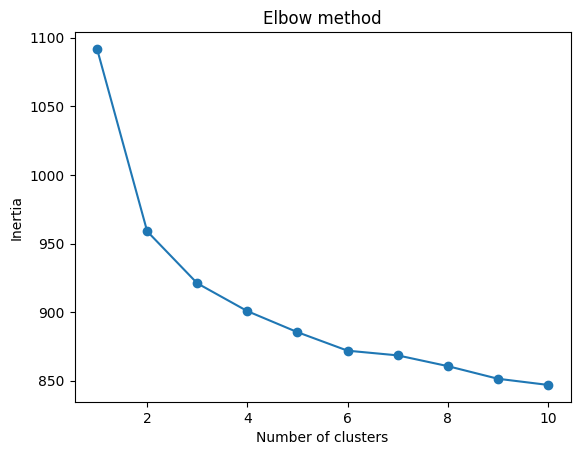

In [55]:
from sklearn.cluster import KMeans

doc_vectors_list = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(doc_vectors_list)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
num_clusters = 5
cluster_indices = [i for i in range(num_clusters)]

In [20]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(doc_vectors_list)

KMeans(n_clusters=5)

In [103]:
#find centroids. compute bigram closest to centroid

In [21]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.03579107, -0.03733898, -0.04053117, -0.09006409, -0.00225301,
        -0.21076774,  0.10915174,  0.43626794, -0.38561904, -0.18472089,
        -0.10560514, -0.25794868,  0.28525544,  0.22932994, -0.12051882,
         0.21656266,  0.33024777, -0.00332759, -0.29887728, -0.30800066,
         0.2654126 ,  0.30624084,  0.33976894, -0.04804507,  0.19820463,
         0.09902926, -0.03504807,  0.17623219, -0.21232972,  0.04289476,
        -0.14552946, -0.05190505, -0.13780119,  0.0579239 , -0.18152726,
         0.15182014,  0.33451408, -0.10439213,  0.03511976, -0.12706693,
         0.21940919, -0.05568429, -0.02309346,  0.04116948,  0.49176537,
        -0.02000412, -0.07772142, -0.20517108,  0.14561447,  0.22433564],
       [-0.00474093, -0.04307054, -0.02233308, -0.02884341,  0.00499513,
        -0.12793337,  0.0814812 ,  0.25124973, -0.22527761, -0.09573274,
        -0.06513608, -0.16375671,  0.13881778,  0.17228466, -0.04114946,
         0.13044293,  0.16845298,  0.01619412, -0.

In [159]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[1.1704277195781763,
 1.3373457673396927,
 1.4827011398061392,
 1.1940693272934606,
 0.933735340015344,
 1.0475608154420104,
 0.9463845844159807,
 1.324913208312707,
 0.9584375959466346,
 1.1315114770691295]

In [160]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(list(doc_vectors.values()))
explained_variance = pca.explained_variance_ratio_

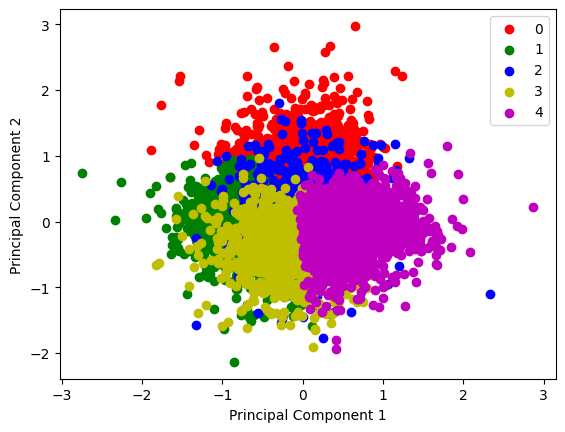

In [161]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b", "y","m"]
for index, color in zip(cluster_indices, colors):
    pca_fit_cluster = [pt[0] for pt in pca_labeled if pt[1] == index]
    pca_fit_i_x = np.array(pca_fit_cluster).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_cluster).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=index)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [145]:
#a selection of poliical words 
political_keywords = list(pd.read_csv("political_keywords.csv"))

In [146]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [110]:
#get a list of political bigrams directly
political_bigrams = list(pd.read_csv("political_bigrams.csv"))

In [111]:
political_bigrams[:10]

['economic policy',
 'foreign affairs',
 'national security',
 'civil rights',
 'social justice',
 'tax reform',
 'health care',
 'immigration law',
 'gun control',
 'climate change']

In [147]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in political_bigrams}

In [148]:
list(bigram_vecs.values())[0]

array([ 0.1292554 ,  0.05221849,  0.07467505, -0.03621169, -0.14072654,
       -0.24994045, -0.16251802,  0.02739681,  0.23220694,  0.02500964,
        0.16663796,  0.03592148, -0.05315223,  0.13791613,  0.04794726,
        0.13876547, -0.01018192, -0.07261224,  0.11366235,  0.14859731,
        0.1520435 ,  0.11433718,  0.0168482 , -0.32030213,  0.07213355,
       -0.12928444, -0.03127538, -0.12272658, -0.16424702, -0.11031263,
        0.12099104,  0.2123381 ,  0.02284978, -0.02859081, -0.33915788,
       -0.11272372, -0.00236297,  0.04309709,  0.10848338, -0.07363451,
       -0.01764352,  0.20515478,  0.01593425, -0.27737254,  0.09052016,
       -0.12123673, -0.01928576,  0.09070715,  0.10008331,  0.31387082,
       -0.13439395, -0.21688212, -0.08595523, -0.02557238,  0.00177052,
       -0.07514016,  0.15676326,  0.2675356 , -0.13283148,  0.19238125,
       -0.1233586 ,  0.29895693, -0.20030178, -0.0540098 , -0.2545534 ,
        0.00853755, -0.0241829 , -0.20310432, -0.10479623,  0.05

In [114]:
#define cosine similarity
from numpy.linalg import norm
def cosine_similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [149]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2**32
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        #dist = cosine_similarity(centroid, embedding)
        dist = np.linalg.norm(centroid - embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [150]:
nearest_bigram_to_centroid

[('international law', 0.6464107436525593),
 ('human rights', 0.34984701631629833),
 ('domestic policy', 1.1113556331623462),
 ('tax reform', 0.4704386652179738),
 ('federal government', 0.8560725165390126)]

In [133]:
for comment in sample_data[:10]:
    print(comment)

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…
RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…
Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate
Deer in the headlights RT @lizzwinstea

In [29]:
#label the data with the appropriate label from k-means clustering
labeled_data = list(zip(sample_data,kmeans.labels_))

In [30]:
#separate documents by label. build vocabulary for each cluster
cluster_vocab = [[] for label in cluster_indices]
cluster_docs = [[] for label in cluster_indices]
for doc, label in labeled_data:
    cluster_vocab[label] += word_tokenize(doc.lower())
    cluster_docs[label].append(doc)

In [123]:
#METHOD 2) use word embeddings to compute distance from word to list of words, take closest words

In [31]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [32]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [33]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).cosine_similarity(nlp(word)) for word in wordset])

In [34]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_17452/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.2748392664312949

In [38]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [39]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)

In [35]:
#METHOD 3: Use TF-IDF on each cluster to extract top two words
from sklearn.feature_extraction.text import TfidfVectorizer
def top_words_in_cluster(cluster_index,num_words=10):
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
    corpus_tfidf = tfidf_vectorizer.fit_transform(cluster_docs[cluster_index])
    tfidf_df = pd.DataFrame(corpus_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
    tfidf_scores = tfidf_df.sum(axis=0)
    return tfidf_scores.nlargest(n=num_words)

In [37]:
top_words_in_cluster(0)

http               20.486685
https               8.817792
trump               7.374561
night               6.819720
realdonaldtrump     4.549463
debate              4.495866
like                4.294735
megynkelly          3.936301
tcot                3.930416
gop                 3.620411
dtype: float64